# ***IMPORTING ALL PACKAGES/MODULES***




In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

# ***UPLOAD YOUR BRAIN SCAN HERE***

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
 
scan = 0
for fn in uploaded.keys():
   path = '/content/' + fn
   scan = cv2.imread(path)

Saving Y8.jpg to Y8.jpg


# ***THE PROGRAM GREY SCALES THE BRAIN SCAN***

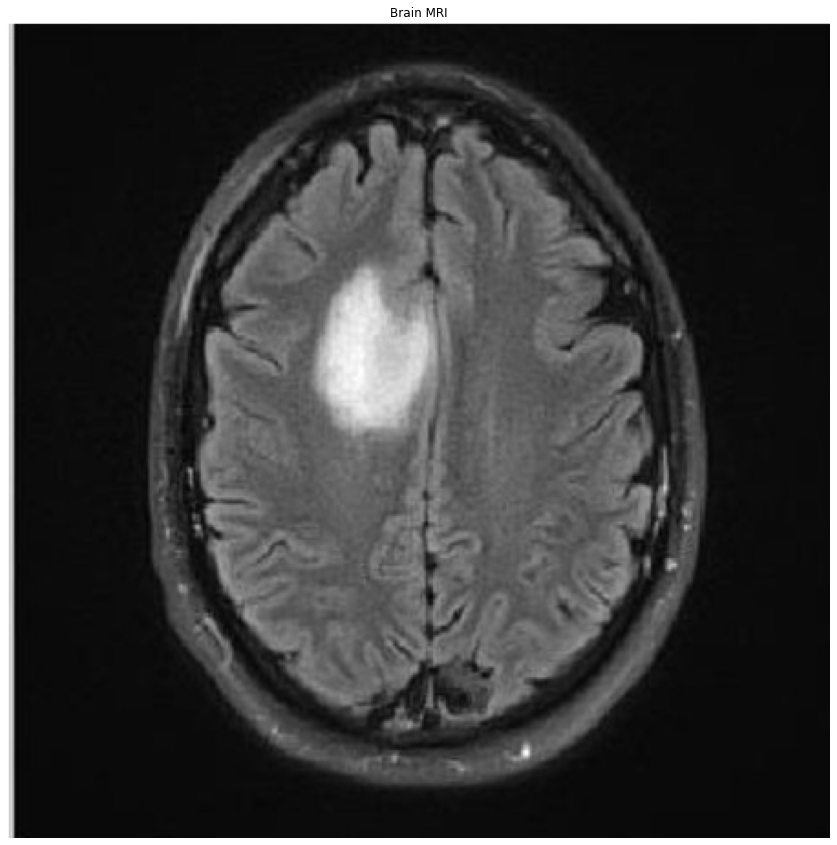

In [ ]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(15, 15))
  if ctype=='abc':
    a,b,c = cv2.split(img)   
    rgb_img = cv2.merge([r,g,b])   
    plt.imshow(igb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='abc':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()
img           = scan
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI',gray,'gray')

# ***THE PROGRAM PERFORMS THE PROCESS OF THRESHOLDING ON THE BRAIN SCAN***

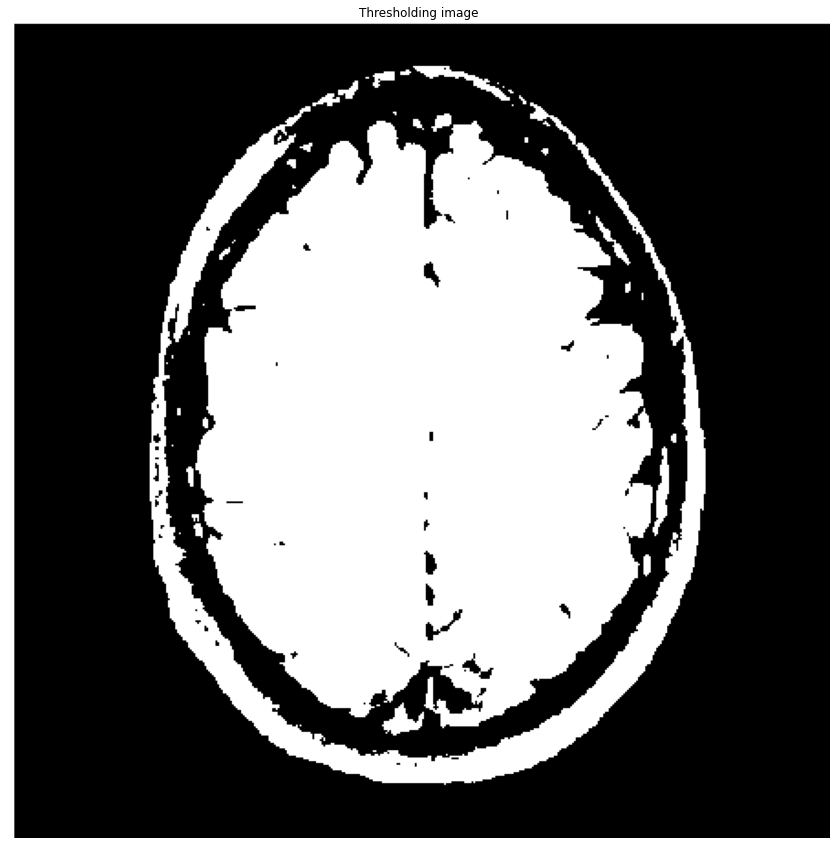

In [ ]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')
ret, markers = cv2.connectedComponents(thresh)
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
largest_component = np.argmax(marker_area)+1                      
brain_mask = markers==largest_component
brain_out = img.copy()
brain_out[brain_mask==False] = (0,0,0)
img = scan
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# ***THE FINAL ENHANCED SEGMENTATED BRAIN SCAN TO MAKE THE BRAIN TUMOR DETECTION EASY***

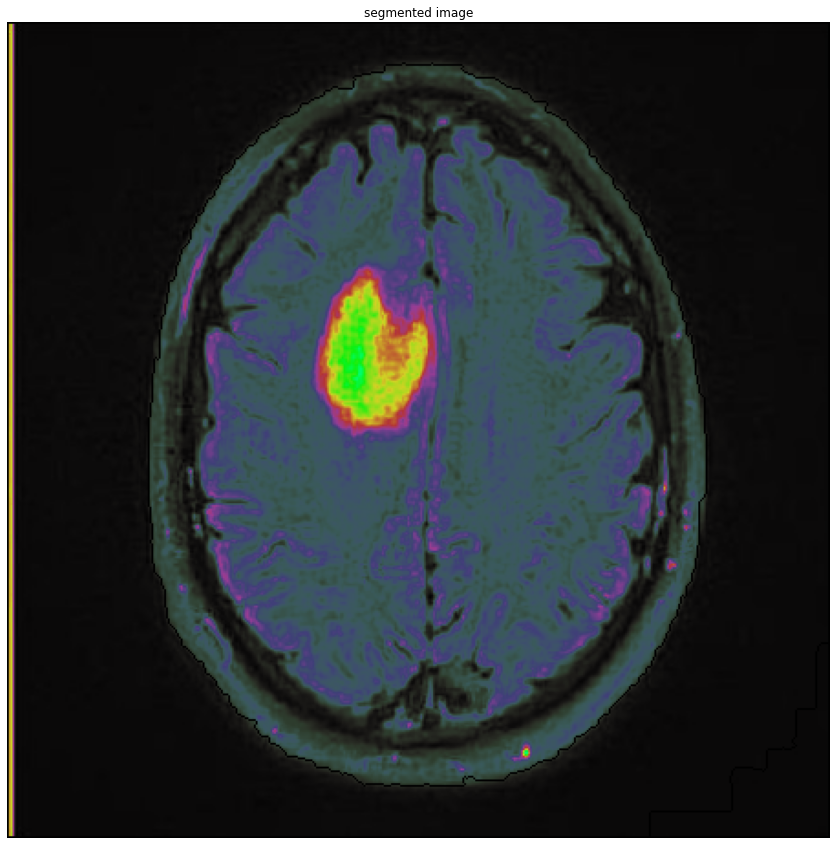

In [ ]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('segmented image',im1,'gray')


# ***THANK YOU!!***